# **Import**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')

# **Data Exploring**

In [2]:
df = pd.read_csv('Walmart Dataset.csv', encoding="latin")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,06/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# **Preprocessing**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9971 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
df.isna().sum()[df.isna().sum() > 0]

Ship Mode    23
Discount     49
dtype: int64

In [5]:
print("the range of discout start with : ",
      df['Discount'].min(), " and end with : ", df['Discount'].max())


df['Discount'] = df['Discount'].fillna(df['Discount'].mean())

the range of discout start with :  0.0  and end with :  0.8


In [6]:
df.isna().sum()[df.isna().sum() > 0]

Ship Mode    23
dtype: int64

In [7]:
# df['Ship Mode'].isna().sum()

In [8]:
df['Ship Mode'].mode()

0    Standard Class
Name: Ship Mode, dtype: object

In [9]:
most_shipped_mode = df['Ship Mode'].mode().iloc[0]
most_shipped_mode

'Standard Class'

In [10]:
# we made it manually
for ndx, item in enumerate(df['Ship Mode']):
    if pd.isna(item):  # ndx for iteraton and item for items of Ship Mode column
        df.loc[ndx, 'Ship Mode'] = most_shipped_mode

In [11]:
df['Ship Mode'].isna().sum()

0

In [12]:
df['Ship Mode'].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [13]:
# df['Ship Mode'].isnull().sum()

In [14]:
df['Ship Mode'] = df['Ship Mode'].map(
    {'Standard Class': 0, 'Second Class': 1, 'First Class': 2, 'Same Day': 3})

In [15]:
df['Ship Mode'].value_counts()

Ship Mode
0    5968
1    1945
2    1538
3     543
Name: count, dtype: int64

In [16]:
df['Ship Mode']

0       1
1       1
2       1
3       0
4       0
       ..
9989    1
9990    0
9991    0
9992    0
9993    1
Name: Ship Mode, Length: 9994, dtype: int64

In [17]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [18]:
df['Region'] = df['Region'].map(
    {'Central': 0, 'East': 1, 'West': 2, 'South': 3})

In [19]:
df['Region']

0       3
1       3
2       2
3       3
4       3
       ..
9989    3
9990    2
9991    2
9992    2
9993    2
Name: Region, Length: 9994, dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   int64  
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   int64  
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [22]:
df['Ship Mode'].dtype

dtype('int64')

In [23]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [24]:
df['Ship Mode'].isna().sum()

0

In [25]:
df[df['Ship Mode'].isna() == True]['Ship Mode'] = df['Ship Mode'].mode().iloc[0]

In [26]:
df['Ship Mode'].isna().sum()

0

In [27]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   int64         
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   int64         
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [29]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [30]:
# # prompt: create new column names loss contains the negative values of profit column and delete from profit

# df['Loss'] = -df['Profit']


In [31]:
# # prompt: drop row

# df = df.drop(df.loc[df['Profit'] < 0].index)


In [32]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,3,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,3,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,2,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,3,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,3,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,1,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,3,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,0,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,2,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,0,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,2,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,0,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,2,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   int64         
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   int64         
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [34]:
# df.to_csv('walmart_cleaned.csv', index=False)

# **Visualization**

In [35]:
max_sales_category = df.groupby('Category')['Sales'].sum()
max_sales_category

Category
Furniture          741999.7953
Office Supplies    719047.0320
Technology         836154.0330
Name: Sales, dtype: float64

In [36]:
max_sales_segment = df.groupby('Segment')['Sales'].sum()
max_sales_segment

Segment
Consumer       1.161401e+06
Corporate      7.061464e+05
Home Office    4.296531e+05
Name: Sales, dtype: float64

In [37]:
max_sales_region = df.groupby('Region')['Sales'].sum()
max_sales_region

Region
0    501239.8908
1    678781.2400
2    725457.8245
3    391721.9050
Name: Sales, dtype: float64

In [38]:
max_sales_state = df.groupby('State')['Sales'].sum()
max_sales_state

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
CALIFORNIA                 236.1740
California              457451.4575
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                

In [39]:
max_prof_state = df.groupby('State')['Profit'].sum()
max_prof_state

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
CALIFORNIA                 96.2399
California              76285.1472
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12607.8870
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24463.1876
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire 

In [40]:
max_sales_city = df.groupby("City")["Sales"].sum()
max_sales_city

City
Aberdeen         25.500
Abilene           1.392
Akron          2729.986
Albuquerque    2220.160
Alexandria     5519.570
                 ...   
Woonsocket      195.550
Yonkers        7657.666
York            817.978
Yucaipa          50.800
Yuma            840.865
Name: Sales, Length: 531, dtype: float64

In [41]:
max_profit_city = df.groupby("City")["Profit"].sum()
max_profit_city

City
Aberdeen          6.6300
Abilene          -3.7584
Akron          -186.6356
Albuquerque     634.0881
Alexandria      318.6183
                 ...    
Woonsocket       78.6791
Yonkers        2767.7557
York           -102.1692
Yucaipa          13.2080
Yuma           -465.9909
Name: Profit, Length: 531, dtype: float64

In [42]:
# CAT - SALES
print("Category with highest sales is : ",max_sales_category.idxmax())

# SEG - SALES
print("Segment with highest sales is  : ",max_sales_segment.idxmax())


# REGION - SALES
df['Region'] = df['Region'].map({0: 'Central', 1: 'East', 2: 'West', 3: 'South'})

print("Region with highest sales is   : ",max_sales_region.idxmax())

# REGION - PROFIT
max_prof_reg = df.groupby('Region')['Profit'].sum().idxmax()
print("Region with heighest profit is : ",max_prof_reg)

# STATE - SALES
print("Region with heigest sales is   : ",max_sales_state.idxmax())

# STATE - PROFIT
print("State with heighest profit is  : ",max_prof_state.idxmax())

# CITY - SALES
print("City with heigest sales is     : ",max_sales_city.idxmax())



Category with highest sales is :  Technology
Segment with highest sales is  :  Consumer
Region with highest sales is   :  2
Region with heighest profit is :  West
Region with heigest sales is   :  California
State with heighest profit is  :  California
City with heigest sales is     :  New York City


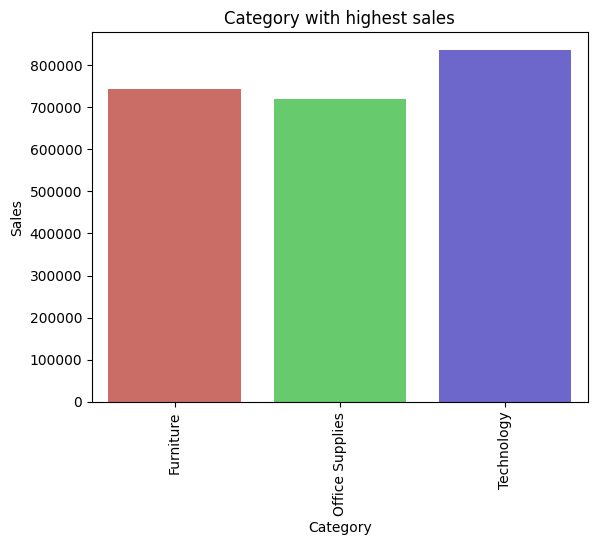

In [43]:
sns.barplot(x=max_sales_category.index, y=max_sales_category.values, palette='hls')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Category with highest sales')
plt.show()

In [44]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [45]:
df["order_year"] = df['Order Date'].dt.year
df['order_year']

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: order_year, Length: 9994, dtype: int32

In [46]:
df["order_day"] = df['Order Date'].dt.day
df["order_day"]

0        8
1        8
2       12
3       11
4       11
        ..
9989    21
9990    26
9991    26
9992    26
9993     4
Name: order_day, Length: 9994, dtype: int32

In [47]:
df["order_month"] = df['Order Date'].dt.month
df["order_month"]

0       11
1       11
2        6
3       10
4       10
        ..
9989     1
9990     2
9991     2
9992     2
9993     5
Name: order_month, Length: 9994, dtype: int32

In [48]:
final_order_year = df.groupby('order_year')['Sales'].sum()
final_order_year

order_year
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64

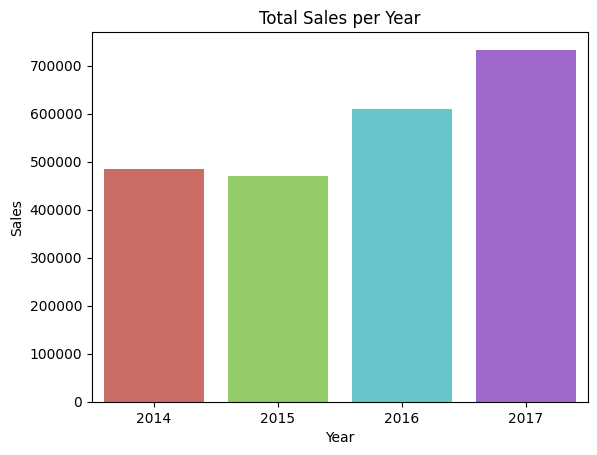

In [49]:
# prompt: plot final order year

import matplotlib.pyplot as plt
sns.barplot(x=final_order_year.index, y=final_order_year.values, palette='hls')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales per Year')
plt.show()


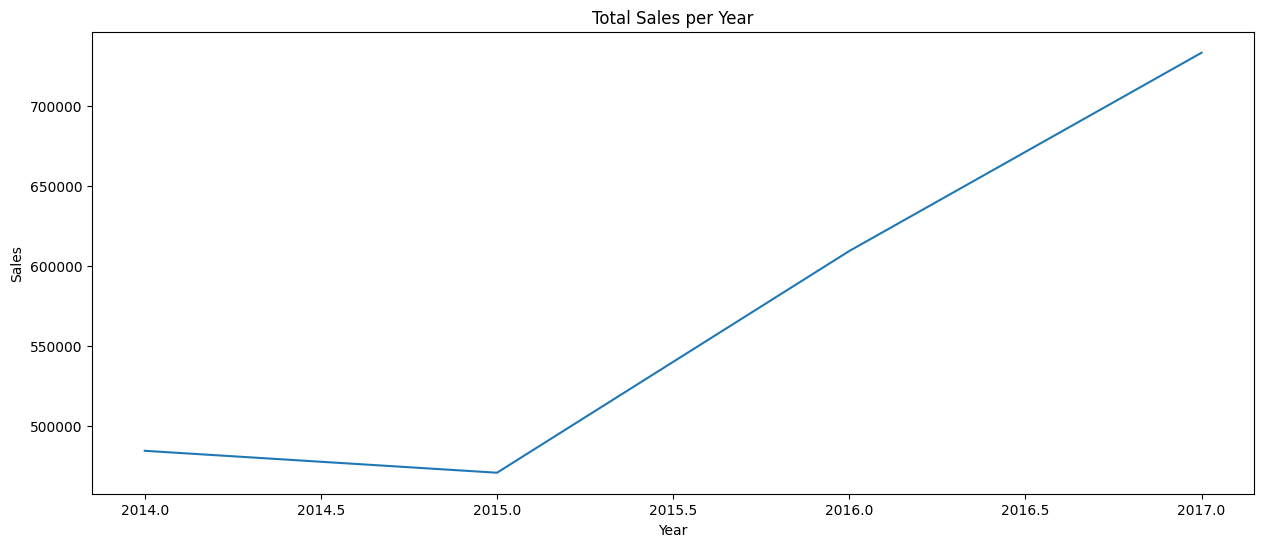

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(final_order_year.index,final_order_year.values)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales per Year')
plt.show()


In [51]:
cat_city = df.groupby(['City'])['Category'].sum()
cat_city

City
Aberdeen                                         Office Supplies
Abilene                                          Office Supplies
Akron          Office SuppliesFurnitureOffice SuppliesFurnitu...
Albuquerque    TechnologyOffice SuppliesOffice SuppliesTechno...
Alexandria     Office SuppliesFurnitureOffice SuppliesOffice ...
                                     ...                        
Woonsocket     FurnitureOffice SuppliesOffice SuppliesOffice ...
Yonkers        FurnitureOffice SuppliesOffice SuppliesTechnol...
York           FurnitureOffice SuppliesOffice SuppliesOffice ...
Yucaipa                                          Office Supplies
Yuma           Office SuppliesTechnologyTechnologyOffice Supp...
Name: Category, Length: 531, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

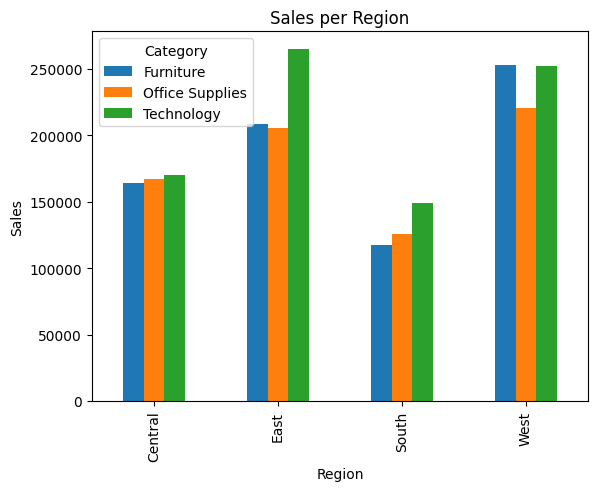

In [52]:
import matplotlib.pyplot as plt
df.groupby(["Region", "Category"])['Sales'].sum().unstack().plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales per Region')
plt.show

# **Modiling**

In [53]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,order_year,order_day,order_month
0,1,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,8,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,1,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,8,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,1,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,12,6
3,4,US-2015-108966,2015-10-11,2015-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,11,10
4,5,US-2015-108966,2015-10-11,2015-10-18,0,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,1,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,21,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,0,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,26,2
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,0,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,26,2
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,0,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,26,2


In [54]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

df[['Ship Mode', 'Segment', 'Region','Category', 'Sub-Category']] = encoder.fit_transform(df[['Ship Mode', 'Segment', 'Region','Category', 'Sub-Category']])

ship Mode = 0.0019 , Segment = 0.011 ,

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [56]:
df.set_index(df['Order Date'],inplace = True)

In [57]:
df.drop(columns = ['Row ID','Order ID','Customer ID','Customer Name','Product ID','Product Name','Country','Ship Date','Order Date'],axis = 1,inplace = True)

In [58]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_year,order_day,order_month
Order Date,,,,,,,,,,,,,,,
2016-11-08,1.0,0.0,Henderson,Kentucky,42420,2.0,0.0,4.0,261.9600,2,0.00,41.9136,2016,8,11
2016-11-08,1.0,0.0,Henderson,Kentucky,42420,2.0,0.0,5.0,731.9400,3,0.00,219.5820,2016,8,11
2016-06-12,1.0,1.0,Los Angeles,California,90036,3.0,1.0,10.0,14.6200,2,0.00,6.8714,2016,12,6
2015-10-11,0.0,0.0,Fort Lauderdale,Florida,33311,2.0,0.0,16.0,957.5775,5,0.45,-383.0310,2015,11,10
2015-10-11,0.0,0.0,Fort Lauderdale,Florida,33311,2.0,1.0,14.0,22.3680,2,0.20,2.5164,2015,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,1.0,0.0,Miami,Florida,33180,2.0,0.0,9.0,25.2480,3,0.20,4.1028,2014,21,1
2017-02-26,0.0,0.0,Costa Mesa,California,92627,3.0,0.0,9.0,91.9600,2,0.00,15.6332,2017,26,2
2017-02-26,0.0,0.0,Costa Mesa,California,92627,3.0,2.0,13.0,258.5760,2,0.20,19.3932,2017,26,2


In [59]:
y = df['Sales']
x = df.drop(columns = ['Sales','order_year','City','State'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [60]:
LRModel = LinearRegression()
LRModel.fit(X_train, y_train)

y_pred = LRModel.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 224.06005700228818
Mean Squared Error: 188661.73860911434
R-squared: 0.5198498095484388


In [61]:
from xgboost import XGBRegressor
XGBModel = XGBRegressor(objective ='reg:squarederror', n_estimators=150)
XGBModel.fit(X_train, y_train)

y_pred = XGBModel.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 90.09195486142856
Mean Squared Error: 130925.99578315626
R-squared: 0.6667891313108795


In [62]:
from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(n_estimators=150, random_state=40)
RFModel.fit(X_train, y_train)


y_pred = RFModel.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:",  mse)
print("R-squared:", r2)


Mean Absolute Error: 68.10923063365018
Mean Squared Error: 38876.45929108345
R-squared: 0.9010581611814199


In [63]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

DTModel = DecisionTreeRegressor(max_depth=10)
DTModel.fit(X_train, y_train)
y_pred = DTModel.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 49209.45785206692
R-squared: 0.8747603476259572


#  **Time Series**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   float64
 1   Segment       9994 non-null   float64
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   float64
 6   Category      9994 non-null   float64
 7   Sub-Category  9994 non-null   float64
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
 12  order_year    9994 non-null   int32  
 13  order_day     9994 non-null   int32  
 14  order_month   9994 non-null   int32  
dtypes: float64(8), int32(3), int64(2), object(2)
memory usage: 1.1+ MB


In [65]:
# df["order_year"] = pd.to_datetime(df["order_year"],format="%Y")

In [66]:
df

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_year,order_day,order_month
Order Date,,,,,,,,,,,,,,,
2016-11-08,1.0,0.0,Henderson,Kentucky,42420,2.0,0.0,4.0,261.9600,2,0.00,41.9136,2016,8,11
2016-11-08,1.0,0.0,Henderson,Kentucky,42420,2.0,0.0,5.0,731.9400,3,0.00,219.5820,2016,8,11
2016-06-12,1.0,1.0,Los Angeles,California,90036,3.0,1.0,10.0,14.6200,2,0.00,6.8714,2016,12,6
2015-10-11,0.0,0.0,Fort Lauderdale,Florida,33311,2.0,0.0,16.0,957.5775,5,0.45,-383.0310,2015,11,10
2015-10-11,0.0,0.0,Fort Lauderdale,Florida,33311,2.0,1.0,14.0,22.3680,2,0.20,2.5164,2015,11,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-21,1.0,0.0,Miami,Florida,33180,2.0,0.0,9.0,25.2480,3,0.20,4.1028,2014,21,1
2017-02-26,0.0,0.0,Costa Mesa,California,92627,3.0,0.0,9.0,91.9600,2,0.00,15.6332,2017,26,2
2017-02-26,0.0,0.0,Costa Mesa,California,92627,3.0,2.0,13.0,258.5760,2,0.20,19.3932,2017,26,2


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   float64
 1   Segment       9994 non-null   float64
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   float64
 6   Category      9994 non-null   float64
 7   Sub-Category  9994 non-null   float64
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
 12  order_year    9994 non-null   int32  
 13  order_day     9994 non-null   int32  
 14  order_month   9994 non-null   int32  
dtypes: float64(8), int32(3), int64(2), object(2)
memory usage: 1.1+ MB


In [68]:
time_series = df.groupby("order_year").sum()
time_series

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_day,order_month
order_year,,,,,,,,,,,,,,
2014,1233.0,1235.0,Los AngelesLos AngelesLos AngelesLos AngelesLo...,CaliforniaCaliforniaCaliforniaCALIFORNIACalifo...,113271247,3198.0,1927.0,15337.0,484247.4981,7581,316.558806,49543.9741,31180,15663
2015,1320.0,1318.0,Fort LauderdaleFort LauderdaleFort WorthFort W...,FloridaFloridaTexasTexasUtahPennsylvaniaPennsy...,111208247,3250.0,2059.0,15704.0,470532.5090,7979,328.816696,61618.6037,33199,16703
2016,1738.0,1725.0,HendersonHendersonLos AngelesSeattleFremontFre...,KentuckyKentuckyCaliforniaWashingtonNebraskaNe...,141003420,4007.0,2484.0,19936.0,609205.5980,9837,402.517613,81795.1743,39309,20079
2017,2359.0,2308.0,ConcordPhiladelphiaHoustonNapervilleMelbourneJ...,North CarolinaPennsylvaniaTexasIllinoisFlorida...,186089738,5242.0,3250.0,24882.0,733215.2552,12476,520.888530,93439.2696,50904,25605


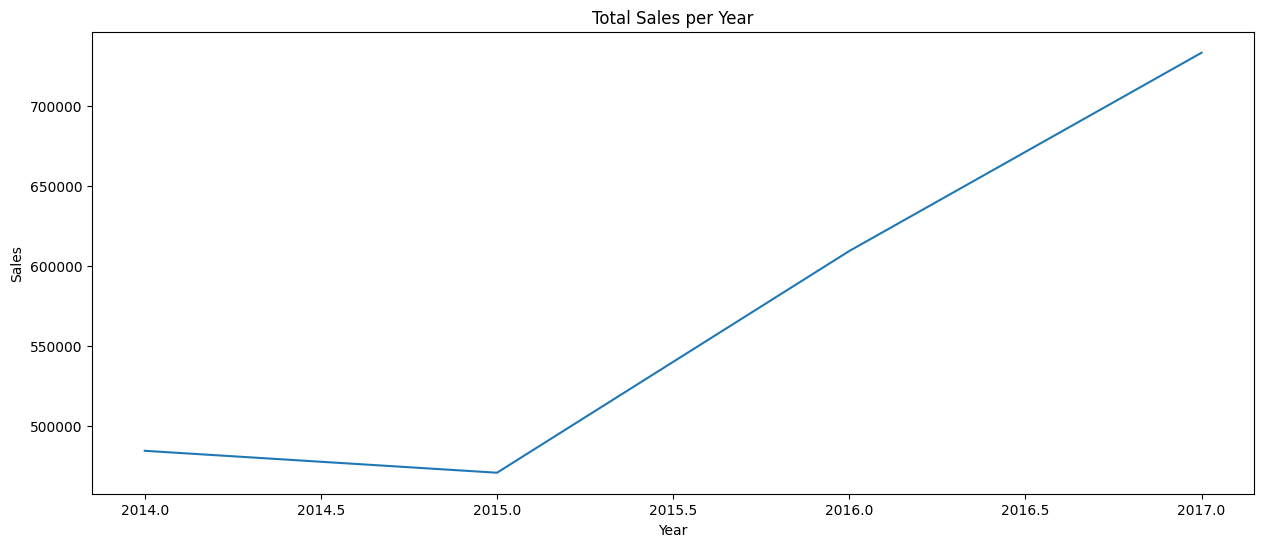

In [69]:

time_series['Sales'].plot(figsize=(15,6))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Total Sales per Year')
plt.show()


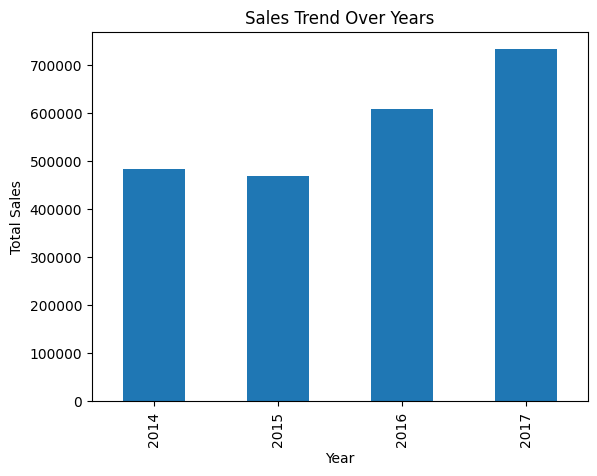

In [70]:
df.groupby("order_year")["Sales"].sum().plot(kind="bar")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Years")
plt.show()


In [71]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


In [72]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_year,order_day,order_month
Order Date,,,,,,,,,,,,,,,
2016-11-08,1.0,0.0,Henderson,Kentucky,42420,2.0,0.0,4.0,261.9600,2,0.00,41.9136,2016,8,11
2016-11-08,1.0,0.0,Henderson,Kentucky,42420,2.0,0.0,5.0,731.9400,3,0.00,219.5820,2016,8,11
2016-06-12,1.0,1.0,Los Angeles,California,90036,3.0,1.0,10.0,14.6200,2,0.00,6.8714,2016,12,6
2015-10-11,0.0,0.0,Fort Lauderdale,Florida,33311,2.0,0.0,16.0,957.5775,5,0.45,-383.0310,2015,11,10
2015-10-11,0.0,0.0,Fort Lauderdale,Florida,33311,2.0,1.0,14.0,22.3680,2,0.20,2.5164,2015,11,10


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9994 entries, 2016-11-08 to 2017-05-04
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   float64
 1   Segment       9994 non-null   float64
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Postal Code   9994 non-null   int64  
 5   Region        9994 non-null   float64
 6   Category      9994 non-null   float64
 7   Sub-Category  9994 non-null   float64
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
 12  order_year    9994 non-null   int32  
 13  order_day     9994 non-null   int32  
 14  order_month   9994 non-null   int32  
dtypes: float64(8), int32(3), int64(2), object(2)
memory usage: 1.1+ MB


In [74]:
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,order_year,order_day,order_month
Order Date,,,,,,,,,,,,,,,
2016-11-08,1.0,0.0,Henderson,Kentucky,42420,2.0,0.0,4.0,261.9600,2,0.00,41.9136,2016,8,11
2016-11-08,1.0,0.0,Henderson,Kentucky,42420,2.0,0.0,5.0,731.9400,3,0.00,219.5820,2016,8,11
2016-06-12,1.0,1.0,Los Angeles,California,90036,3.0,1.0,10.0,14.6200,2,0.00,6.8714,2016,12,6
2015-10-11,0.0,0.0,Fort Lauderdale,Florida,33311,2.0,0.0,16.0,957.5775,5,0.45,-383.0310,2015,11,10
2015-10-11,0.0,0.0,Fort Lauderdale,Florida,33311,2.0,1.0,14.0,22.3680,2,0.20,2.5164,2015,11,10


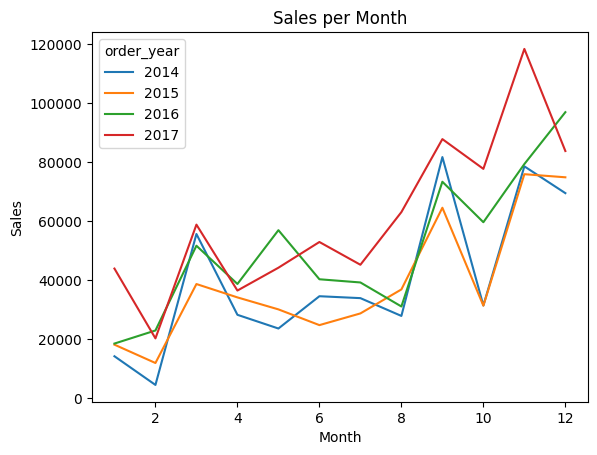

In [75]:
# plot sales of monthes for each year
df.groupby(["order_month", "order_year"])["Sales"].sum().unstack().plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales per Month')
plt.show()


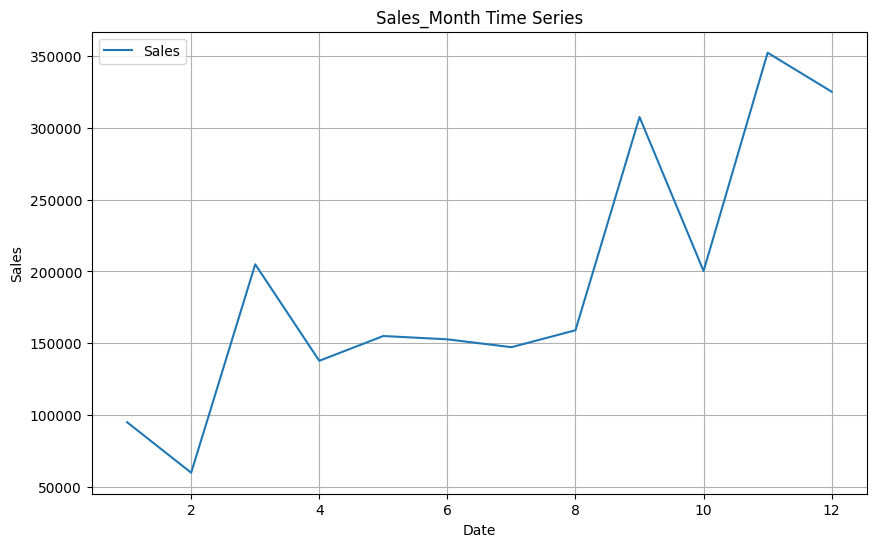

In [76]:
# Step 1: Visualize the time series over monthes
plt.figure(figsize=(10, 6))
df.groupby('order_month')['Sales'].sum().plot(kind='line')
plt.title('Sales_Month Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [77]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

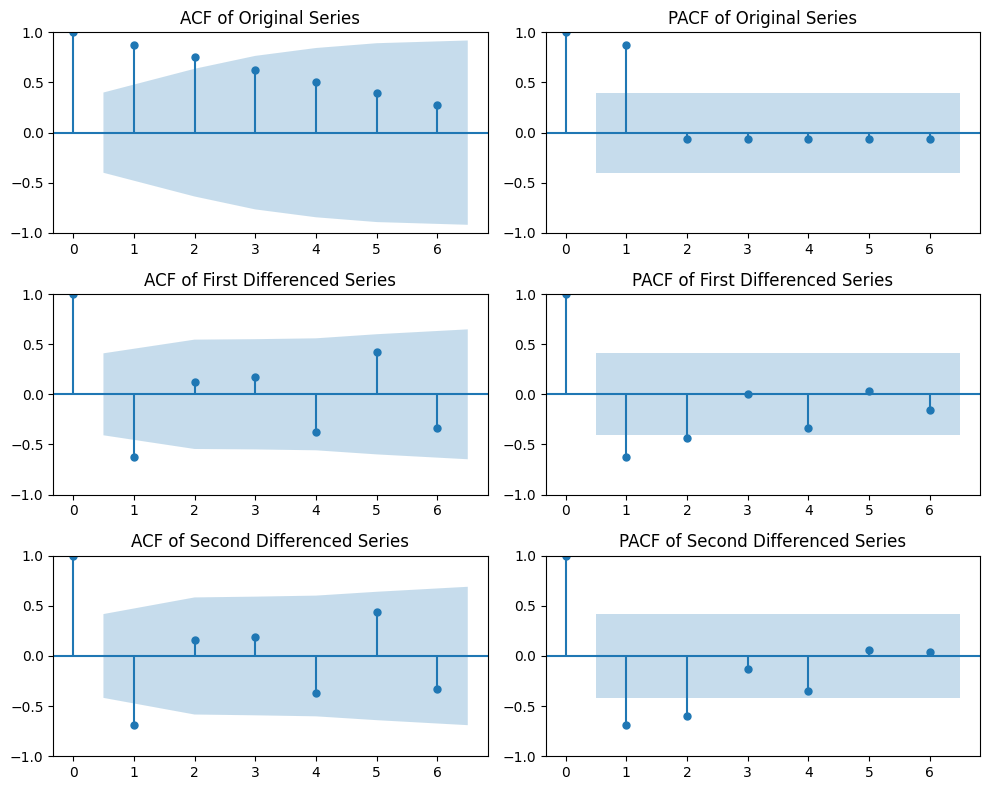

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create sample data for 24 months (2 years)
dates = pd.date_range(start='2016-11-08', periods=24, freq='M')
sales = [i + (i * 0.1) for i in range(24)]
df = pd.DataFrame({'Sales': sales}, index=dates)

# Plot ACF & PACF
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Original Series
plot_acf(df['Sales'], ax=axes[0, 0], lags=6)  # Reduced lags to 6
axes[0, 0].set_title('ACF of Original Series')
plot_pacf(df['Sales'], ax=axes[0, 1], lags=6)  # Reduced lags to 6
axes[0, 1].set_title('PACF of Original Series')

# First Differenced Series
plot_acf(df['Sales'].diff().dropna(), ax=axes[1, 0], lags=6)
axes[1, 0].set_title('ACF of First Differenced Series')
plot_pacf(df['Sales'].diff().dropna(), ax=axes[1, 1], lags=6)
axes[1, 1].set_title('PACF of First Differenced Series')

# Second Differenced Series
plot_acf(df['Sales'].diff().diff().dropna(), ax=axes[2, 0], lags=6)
axes[2, 0].set_title('ACF of Second Differenced Series')
plot_pacf(df['Sales'].diff().diff().dropna(), ax=axes[2, 1], lags=6)
axes[2, 1].set_title('PACF of Second Differenced Series')

plt.tight_layout()
plt.show()


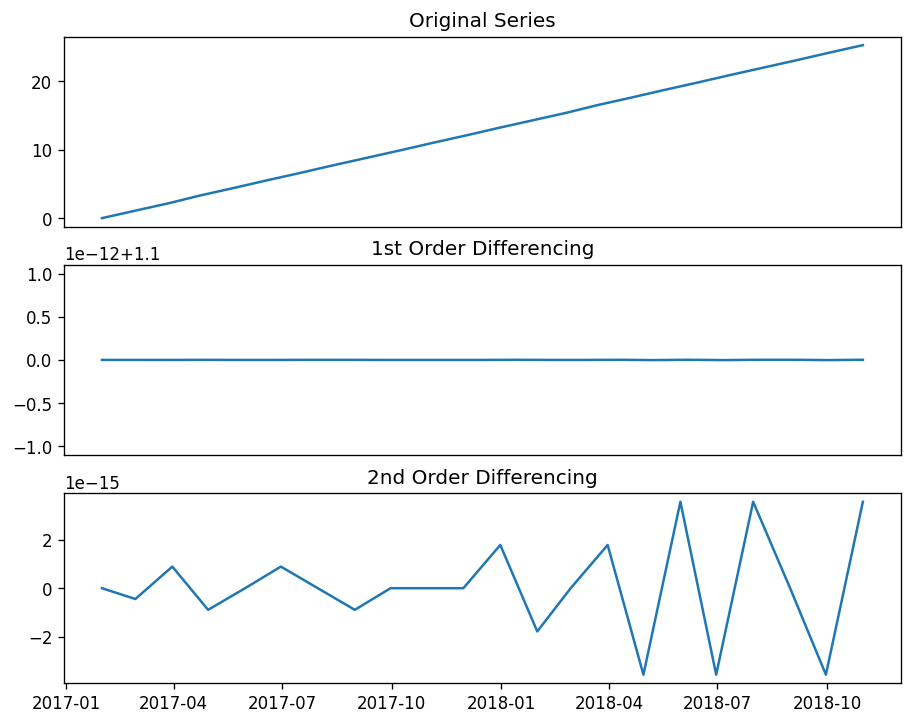

In [79]:
# Finding the value of the d parameter
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df.Sales); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df.Sales.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df.Sales.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

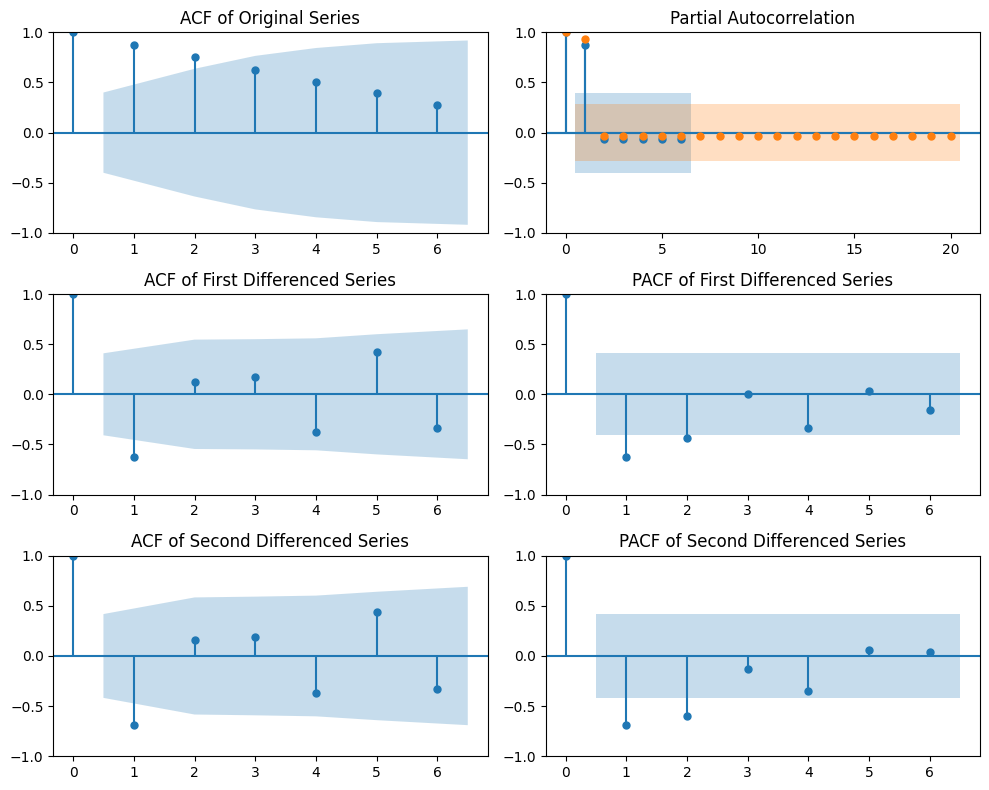

In [80]:
# work on sample as 24 mon = 4 years
dates = pd.date_range(start='2016-11-08', periods=48, freq='M')
sales = [i + (i * 0.1) for i in range(48)]
df = pd.DataFrame({'Sales': sales}, index=dates)

# Plot the PACF with 20 lags
plot_pacf(df['Sales'], ax=axes[0, 1], lags=20)

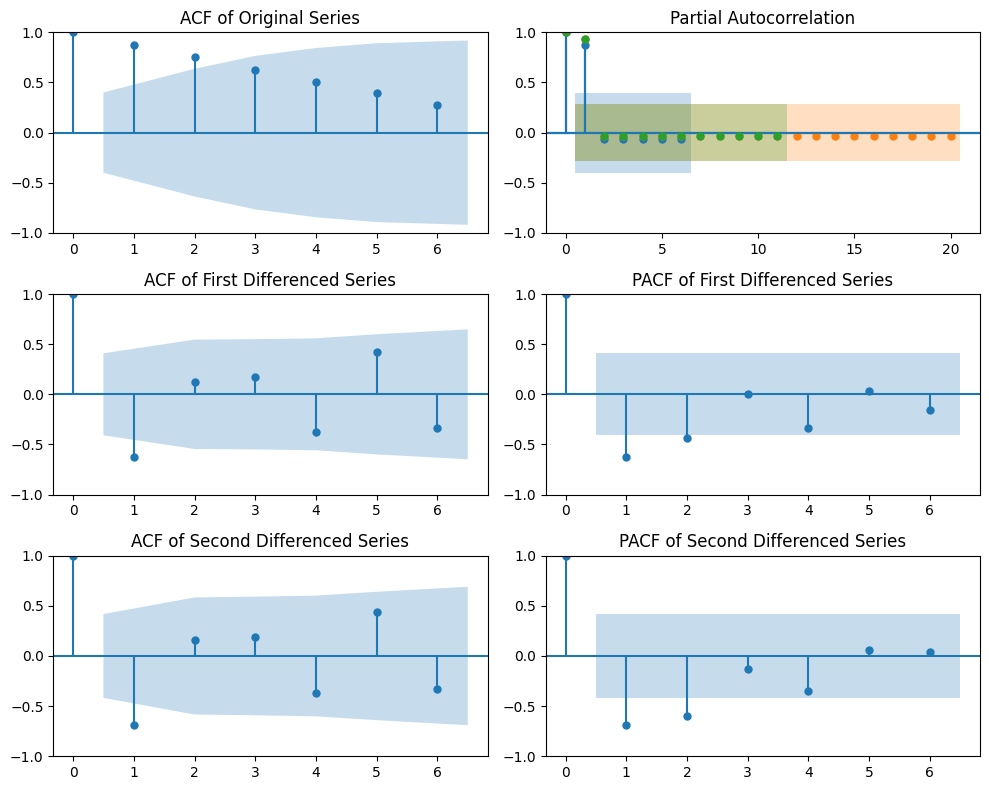

In [81]:
# Reduce the number of lags to 11
plot_pacf(df['Sales'], ax=axes[0, 1], lags=11)

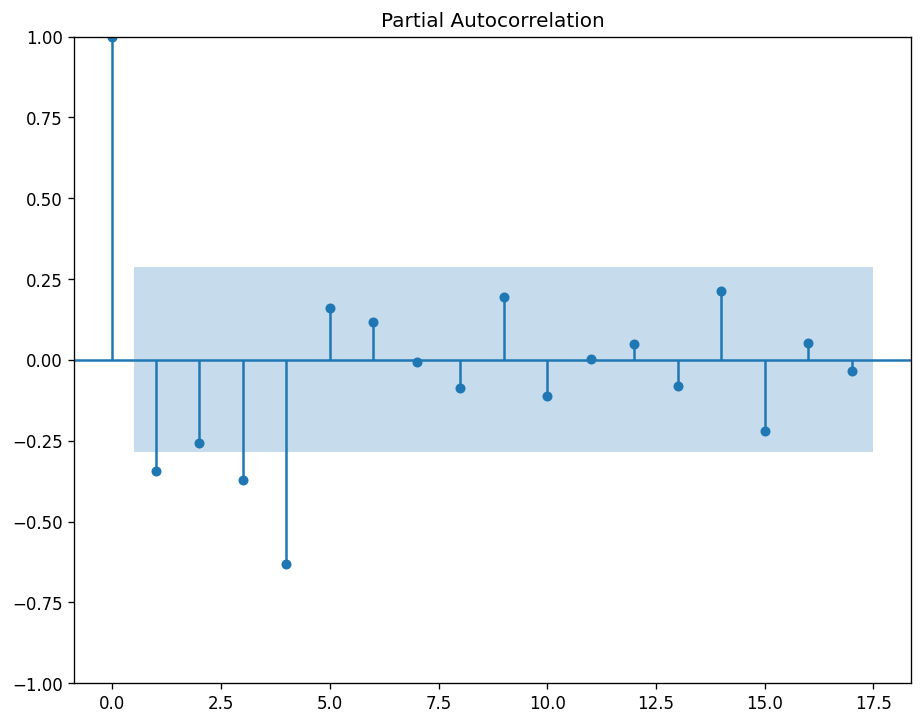

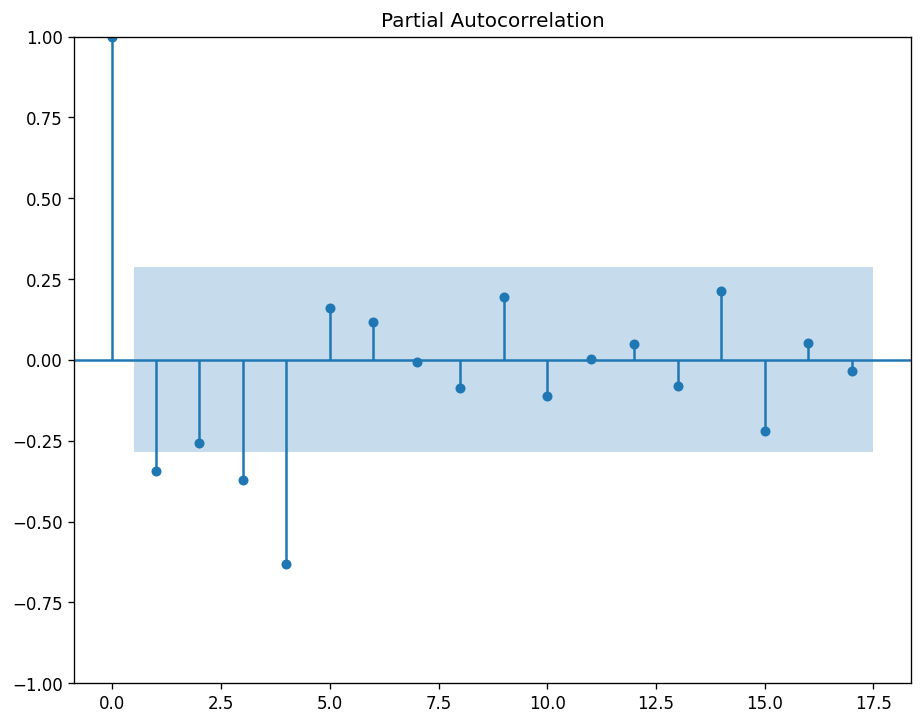

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.Sales.diff().dropna())   # This helps in identifying if the series has a significant AR component and what order (p) should be used.

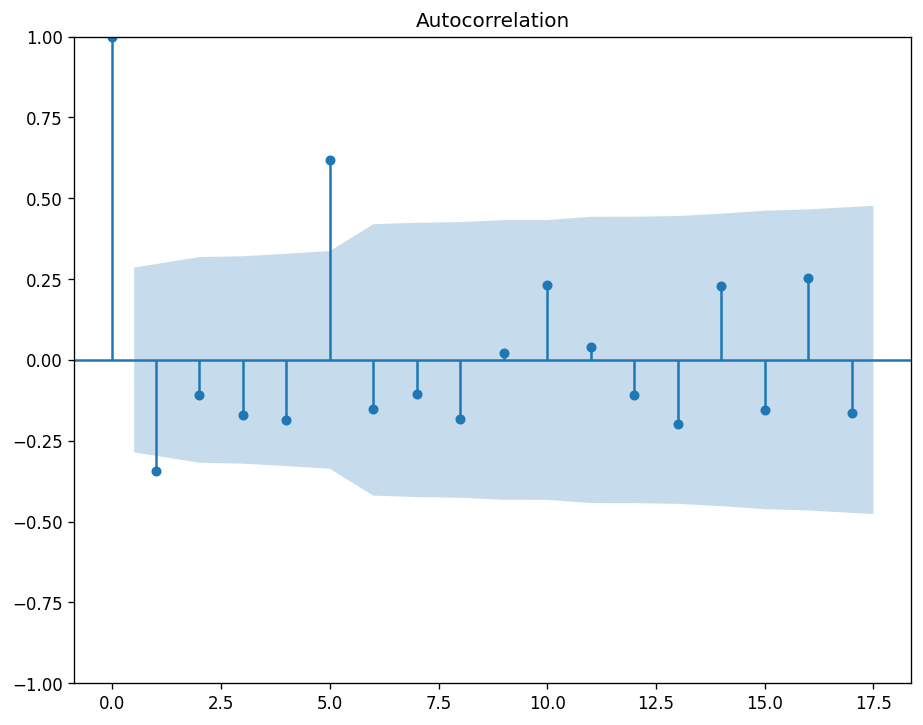

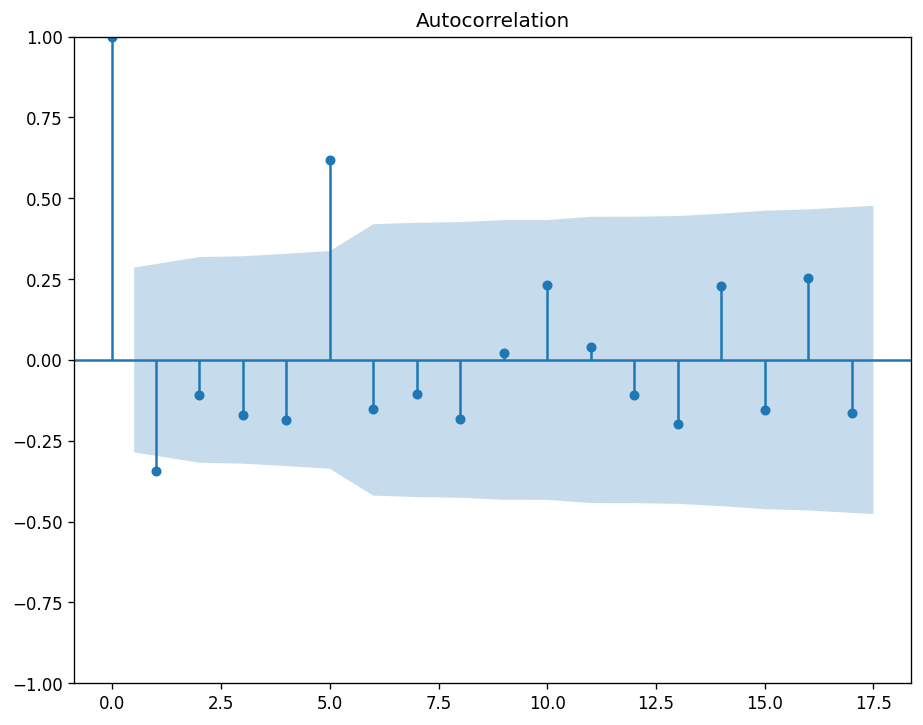

In [83]:
# Finding the value of the q parameter
plot_acf(df.Sales.diff().dropna())    #This helps in identifying if the series has a significant MA component and what order (q) should be used.



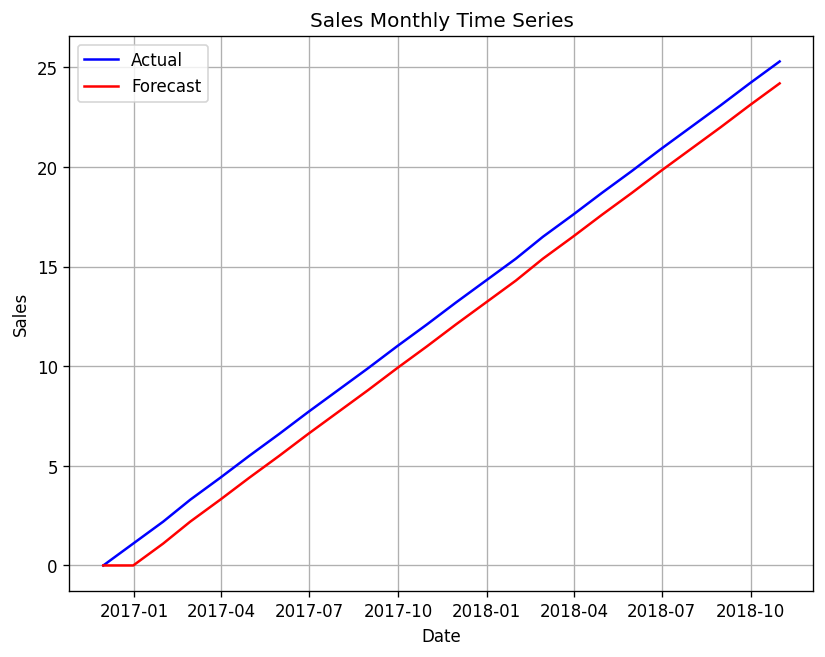

Mean Absolute Error (MAE): 1.05
Mean Squared Error (MSE): 1.16
Root Mean Squared Error (RMSE): 1.08


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

dates = pd.date_range(start='2016-11-08', periods=24, freq='M')
sales = [i + (i * 0.1) for i in range(24)]
df = pd.DataFrame({'Sales': sales}, index=dates)

# Step 4: Build the ARIMA model
model = ARIMA(df['Sales'], order=(0, 1, 0))
arima_model = model.fit()

# Step 5: Predict
forecast = arima_model.predict(start=0, end=len(df)-1, dynamic=False)

# Plotting actual vs forecasted values
plt.figure(figsize=(8, 6))
plt.plot(df.index, df['Sales'], label='Actual', color="blue")
plt.plot(df.index, forecast, label='Forecast', color="red")
plt.title('Sales Monthly Time Series')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Calculate accuracy
mae = mean_absolute_error(df['Sales'], forecast)
mse = mean_squared_error(df['Sales'], forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


In [85]:
forecast

2016-11-30     0.0
2016-12-31     0.0
2017-01-31     1.1
2017-02-28     2.2
2017-03-31     3.3
2017-04-30     4.4
2017-05-31     5.5
2017-06-30     6.6
2017-07-31     7.7
2017-08-31     8.8
2017-09-30     9.9
2017-10-31    11.0
2017-11-30    12.1
2017-12-31    13.2
2018-01-31    14.3
2018-02-28    15.4
2018-03-31    16.5
2018-04-30    17.6
2018-05-31    18.7
2018-06-30    19.8
2018-07-31    20.9
2018-08-31    22.0
2018-09-30    23.1
2018-10-31    24.2
Freq: M, Name: predicted_mean, dtype: float64